In [1]:
import networkx as nx
from karateclub import DeepWalk, EgoNetSplitter, Node2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from neo4j import GraphDatabase
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Getting graph with vechile nodes

In [2]:
def neo4jReturn(cypherTxt):

    results = driver.session().run(cypherTxt)
    nodes = list(results.graph()._nodes.values())
    rels = list(results.graph()._relationships.values())
    nodes2 = list(results.graph()._nodes.values())
    
    return (nodes+nodes2, rels)

def pagerank(G):

    pr = nx.pagerank(DiG, alpha=0.85)
    pr_bigsize = [v * 50e3 for v in pr.values()]
    pr_size = [round(v,4) * 50e3 for v in pr.values()]
#     print(pr_size)
#     names = dict(DiG.nodes.data('name'))
    values = {i:"{:.4f}".format(j) for i, j in zip(range(0,416), list(pr.values()))}
    
    names = {dict(G.nodes.data('name'))[i]:"{:.4f}".format(j) \
             for i, j in zip(range(0,416), list(pr.values()))}
    
    plt.figure(figsize=(20,15))    
    pos = nx.kamada_kawai_layout(DiG)
    nx.draw(DiG, pos, with_labels=True,
            edge_color = "grey",
            font_weight='bold')
    plt.show()
    
#     plt.figure(figsize=(20,15)) 
#     nx.draw(DiG, pos, node_size=pr_size,
#             edge_color = "grey",
#             with_labels=True, font_weight='bold')
#     plt.show()
    
#     plt.figure(figsize=(20,15))    
#     nx.draw(DiG, pos, node_size=pr_bigsize, 
#             edge_color = "grey",
#             with_labels=True, font_weight='bold')
    
#     plt.show()
    return names


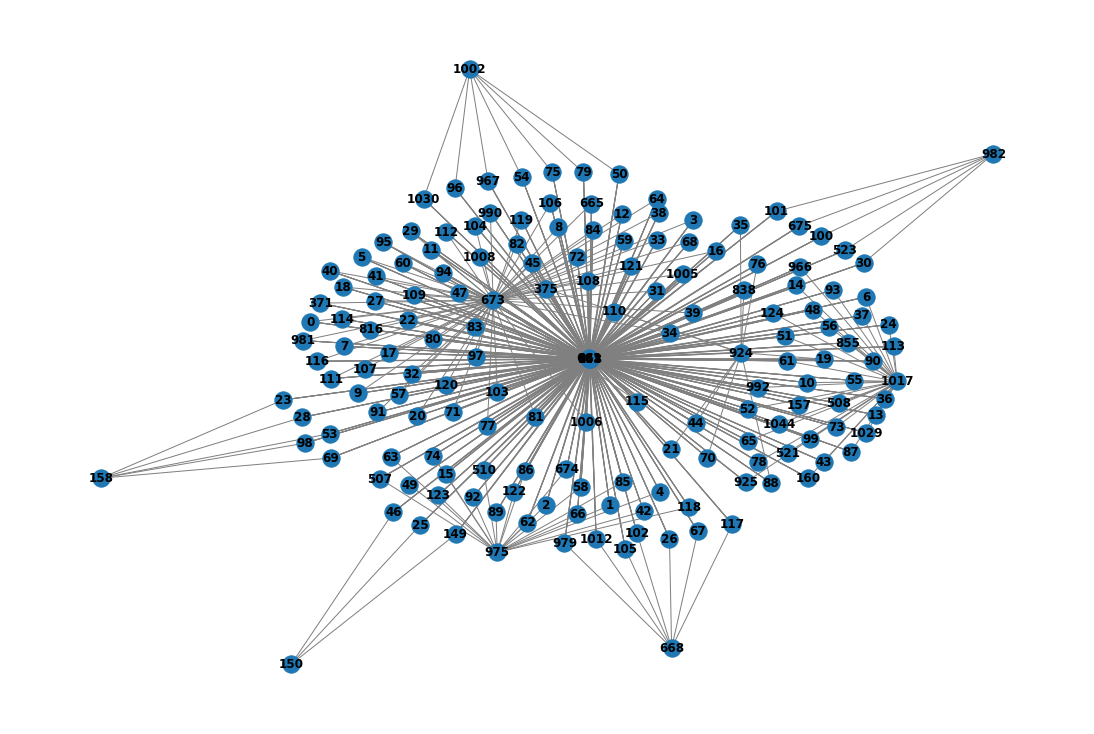

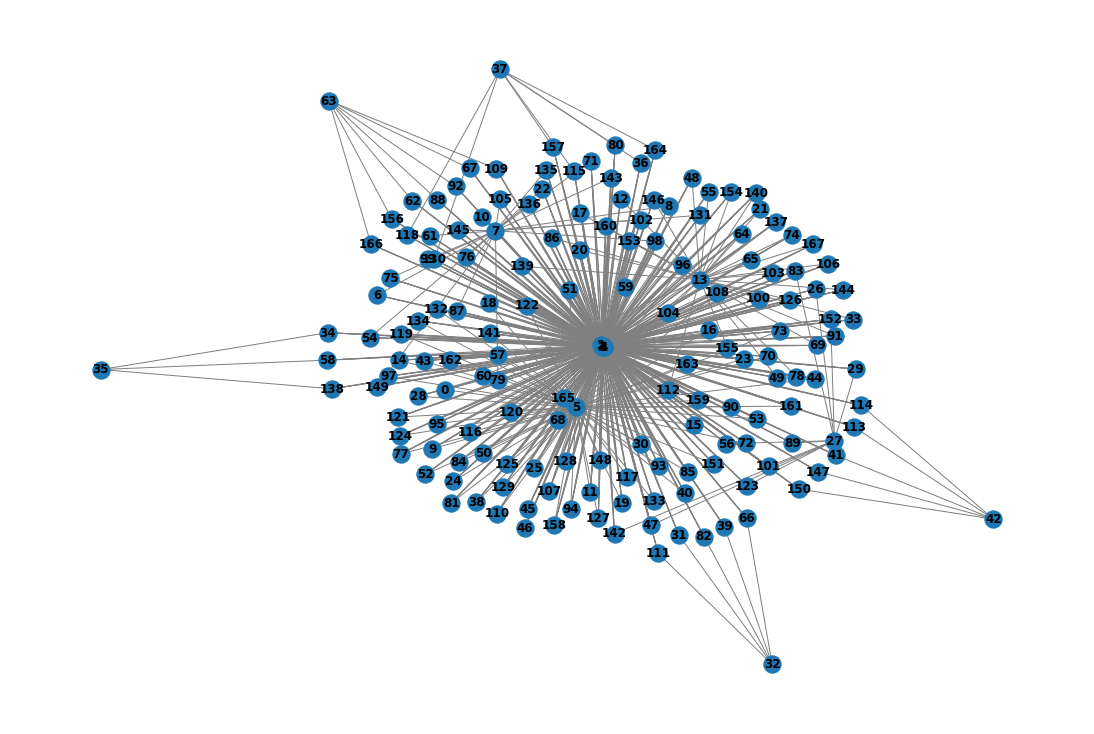

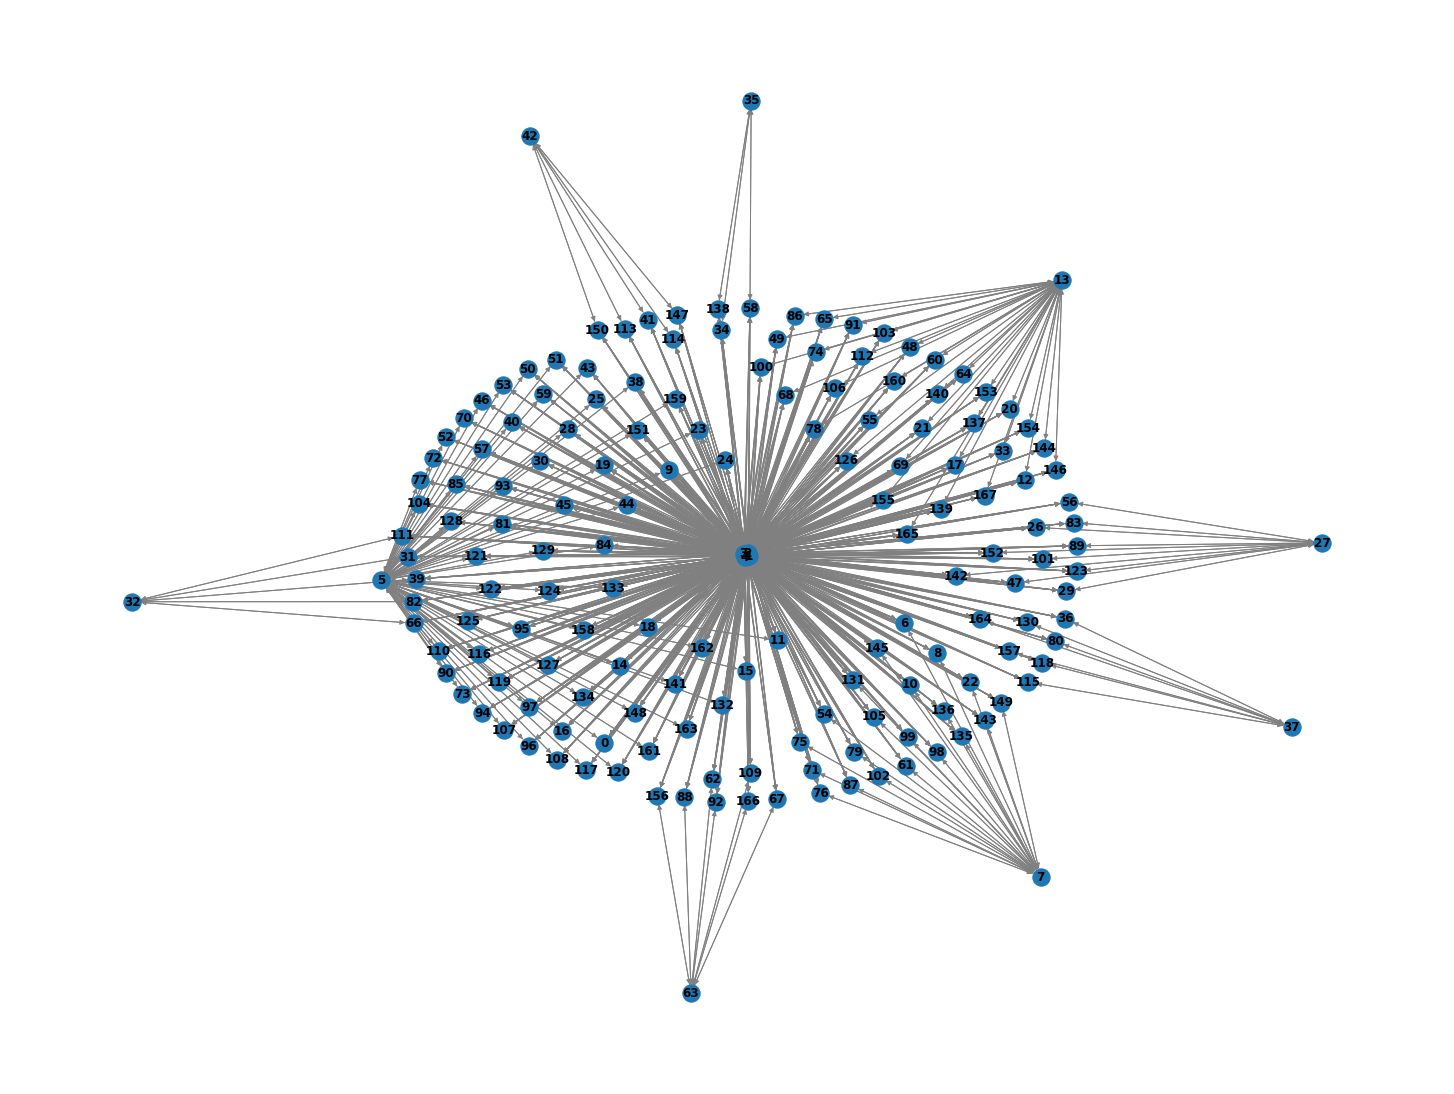

In [3]:
# Main function
if __name__ == '__main__':
    
    nodeid_list = []
    
    # Connecting to Neo4j
    driver = GraphDatabase.driver(
        uri="bolt://localhost:7687", 
        auth=("neo4j", "euroncap"))
    
    # Query to get the nodes
    txt = """
        //html page 
        Match (n:Vehicle)<-[r]-(m) 
        Return n,r,m
        """
    
    # Getting all the nodes and relation
    nodes, rels = neo4jReturn(txt)
    # Creating the empty graph
    H = nx.Graph()

    # Get all the nodes with the properties
    for node in nodes:

        try:
            node_name = node._properties['vehicle_name']        
                            
            label1, label2,  = node._labels
            H.add_node(node.id, name=node_name, 
                       properties=node._properties, 
                       label=label1)
            nodeid_list.append(node.id)
        except:
            try:
                node_name = node._properties['year_name']        
                
            except:
                try:
                    node_name = node._properties['vru_name']
                except:
                    try:
                        node_name = node._properties['sas_name']
                    except:
                        try:
                            node_name = node._properties['cop_name']
                        except:
                            node_name = node._properties['aop_name']                
                            
                
            label,  = node._labels
            H.add_node(node.id, name=node_name, 
                       properties=node._properties, 
                       label=label)
            nodeid_list.append(node.id)        
                    
        
    # Get all the realtions of the node
    for rel in rels:
               
        H.add_edge(rel.start_node.id,
                   rel.end_node.id,
                   color='k',
                   key=rel.id, type=rel.type, 
                   properties=rel._properties)
    
    # Plot the graph as in Neo4j
    plt.figure(figsize=(15,10))
    nx.draw(H, with_labels=True, edge_color = "grey", font_weight='bold')
    
    # Plot the relabelled graph
    H = nx.convert_node_labels_to_integers(H, first_label=0)    
    plt.figure(figsize=(15,10))
    nx.draw(H, with_labels=True, edge_color = "grey", font_weight='bold')
    
    plt.show()  
    

    # Converting to directed graph
    DiG = H.to_directed()
        
    #Pagerank
    names = pagerank(DiG)
#         Saving the graph

#     nx.write_gpickle(DiG, "EuroNcap_dir_graph_kc")

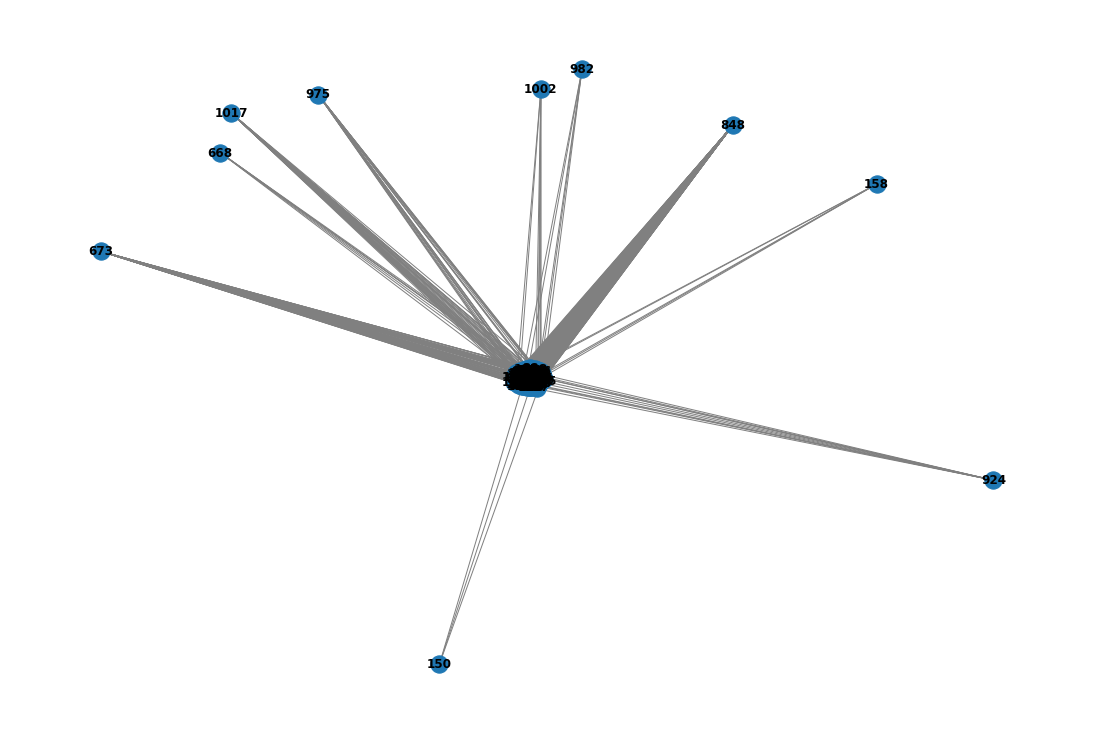

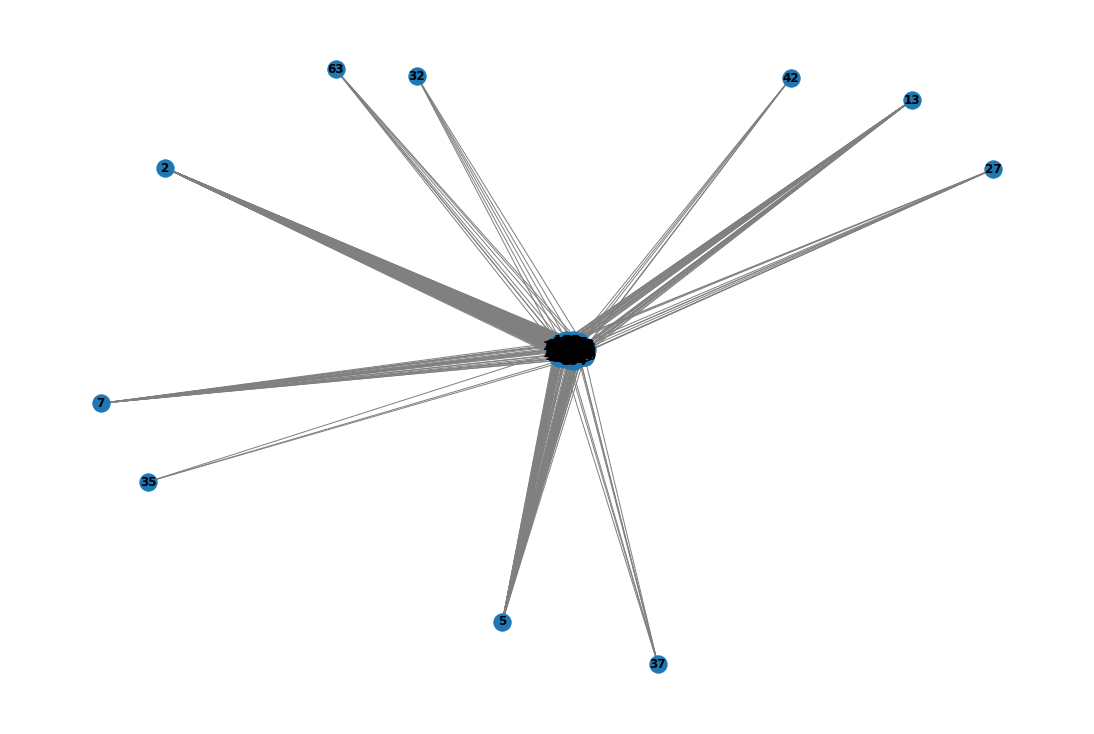

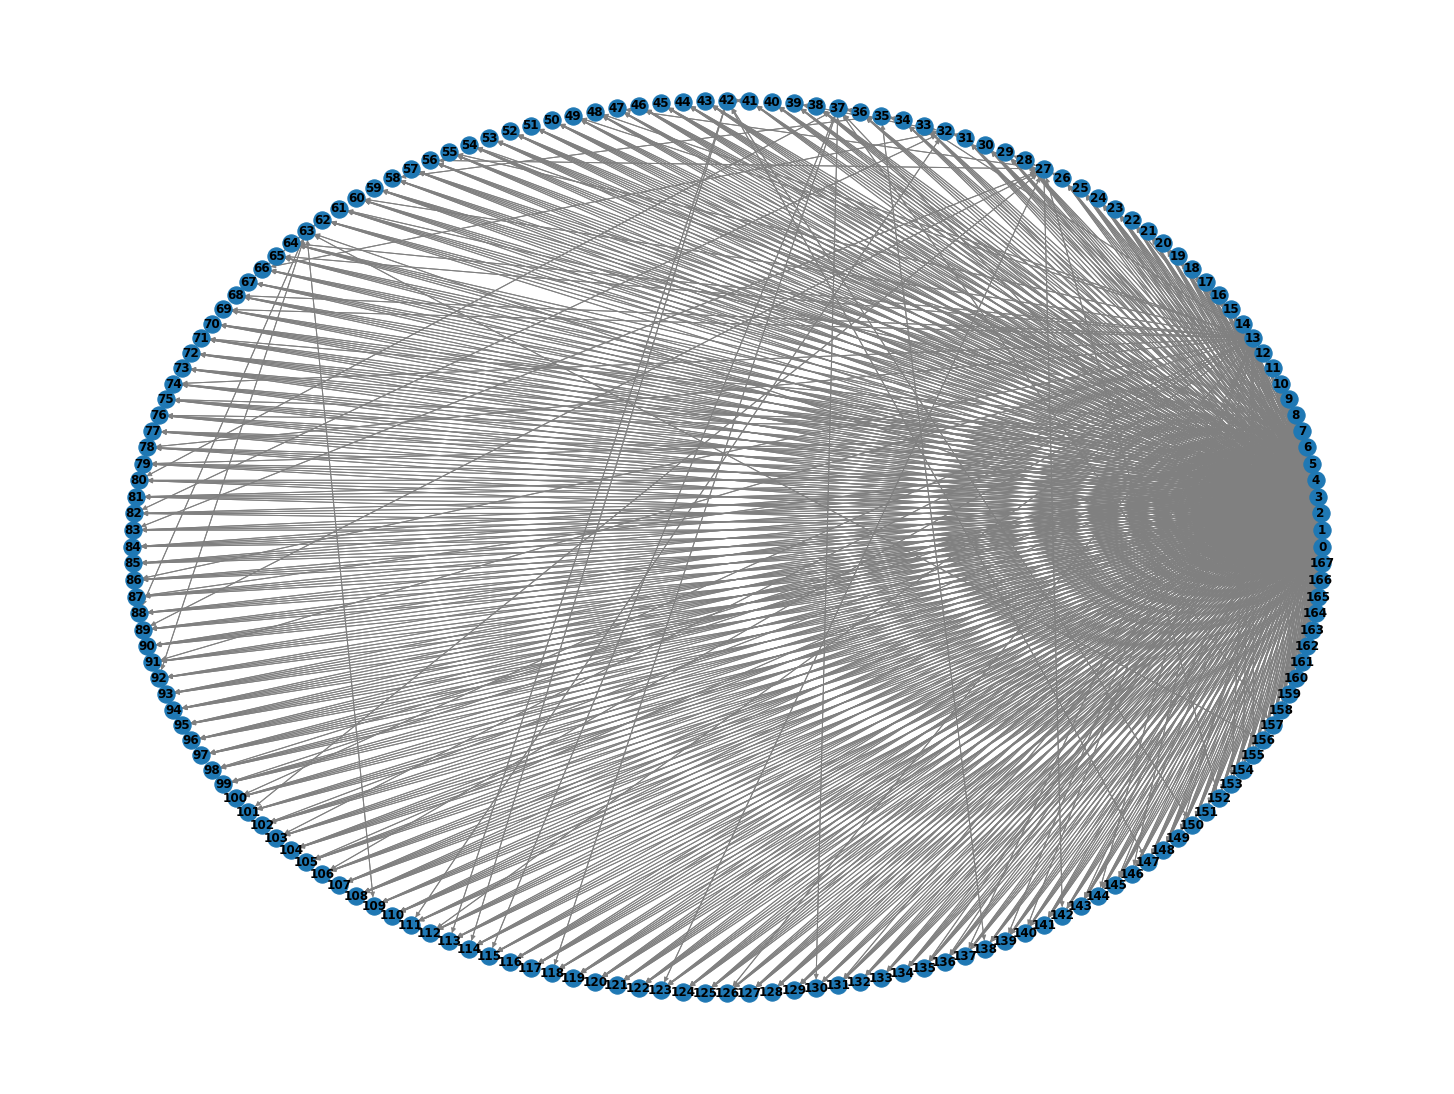

In [15]:
# Main function
if __name__ == '__main__':
    
    nodeid_list = []
    
    # Connecting to Neo4j
    driver = GraphDatabase.driver(
        uri="bolt://localhost:7687", 
        auth=("neo4j", "euroncap"))
    
    # Query to get the nodes
    txt = """
        //html page 
        Match (n:Vehicle)<-[r]-(m) 
        Return n,r,m
        """
    
    # Getting all the nodes and relation
    nodes, rels = neo4jReturn(txt)
    # Creating the empty graph
    G = nx.Graph()

    # Get all the nodes with the properties
    for node in nodes:

        try:
            node_name = node._properties['vehicle_name']        
                            
            label1, label2,  = node._labels
            G.add_node(node.id, name=node_name, 
                       properties=node._properties, 
                       label=label1)
            nodeid_list.append(node.id)
        except:
            try:
                node_name = node._properties['year_name']        
                
            except:
                try:
                    node_name = node._properties['vru_name']
                except:
                    try:
                        node_name = node._properties['sas_name']
                    except:
                        try:
                            node_name = node._properties['cop_name']
                        except:
                            node_name = node._properties['aop_name']                
                            
                
            label,  = node._labels
            G.add_node(node.id, name=node_name, 
                       properties=node._properties, 
                       label=label)
            nodeid_list.append(node.id)        
                    
        
    # Get all the realtions of the node
    for rel in rels:
        try:
            weights = int(rel._properties['vru_ratings'][27:29])
        except:
            try:
                weights = int(rel._properties['cop_ratings'][27:29])
            except:
                try:
                    weights = int(rel._properties['aop_ratings'][27:29])
                except:
                    weights = 0
        G.add_edge(rel.start_node.id,
                   rel.end_node.id,
                   color='k',
                   key=rel.id, type=rel.type, 
                   properties=rel._properties,
                   weight = weights)
    
    # Plot the graph as in Neo4j
    plt.figure(figsize=(15,10))
    nx.draw(G, with_labels=True, edge_color = "grey", font_weight='bold')
    
    # Plot the relabelled graph
    G = nx.convert_node_labels_to_integers(G, first_label=0)    
    plt.figure(figsize=(15,10))
    nx.draw(G, with_labels=True, edge_color = "grey", font_weight='bold')
    
    plt.show()  
    

    # Converting to directed graph
    DiG = G.to_directed()
        
    #Pagerank
    names = pagerank(DiG)
#         Saving the graph

    nx.write_gpickle(DiG, "EuroNcap_dir_graph_kc")
     

## For Neo4j-EuroNcap graph

In [16]:
G = nx.read_gpickle("EuroNcap_dir_graph_kc")
print("Loading", G)

Loading DiGraph with 168 nodes and 1550 edges


In [17]:
model = Node2Vec()
model.fit(G)
embedding = model.get_embedding()

In [18]:
name = nx.get_node_attributes(G, "name")

In [19]:
def tsne(embeddings, hue=None):
    tsne = TSNE(n_components=2, n_iter=300)
    tsne_results = tsne.fit_transform(embeddings['embedding'].to_list())

    embeddings['tsne_x'] = [x[0] for x in list(tsne_results)]
    embeddings['tsne_y'] = [x[1] for x in list(tsne_results)]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne_x", y="tsne_y",
        hue=hue,
        palette=sns.color_palette("hls", 10),
        data=embeddings,
        legend="full",
        alpha=0.9
    )
    
    for i in range(df.shape[0]):
        plt.text(x=df['tsne_x'][i]+0.3,y=df['tsne_y'][i]+0.3,s=df.character[i], 
              fontdict=dict(color='black',size=10),)

In [20]:
def tsne_plotly(embeddings, hue=None):
    tsne = TSNE(n_components=2, n_iter=300)
    tsne_results = tsne.fit_transform(embeddings['embedding'].to_list())
    pyo.init_notebook_mode()
    fig = go.Figure()

    embeddings['tsne_x'] = [x[0] for x in list(tsne_results)]
    embeddings['tsne_y'] = [x[1] for x in list(tsne_results)]

    fig.add_trace(go.Scatter(x = list(embeddings['tsne_x']), y = list(embeddings['tsne_y']),
                             hovertext=list(df['character']),
                             mode = 'markers',
                             name='Nodes',
                             line=dict(
                                    color='blue',
                                    width=1)
                              ))
    
    
    fig.update_layout(title="TSNE Plot for Embedding", width=1000, height=1000, showlegend=False)

    plotly.offline.plot(fig, filename='TSNE Plot for Embedding.html')

/home/ganesh/anaconda3/envs/fraunhofer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/ganesh/anaconda3/envs/fraunhofer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



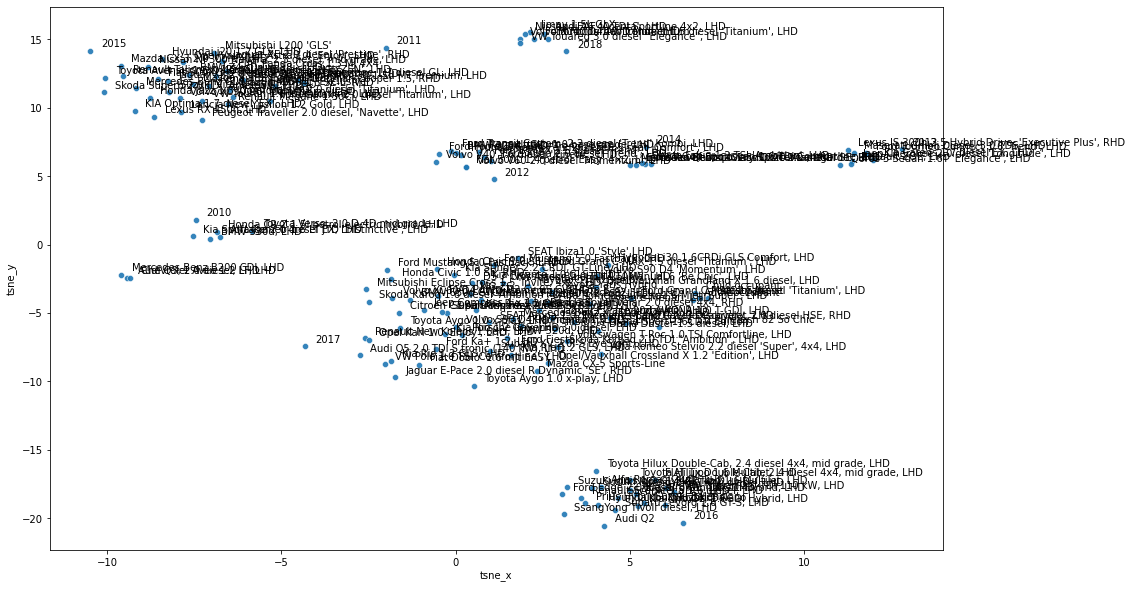

In [21]:
results = []
for val, embed in zip(name, embedding):
    results.append({'character': name[val], 'embedding': embed})    
df = pd.DataFrame.from_dict(results)
tsne(df)

In [22]:
tsne_plotly(df)

/home/ganesh/anaconda3/envs/fraunhofer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/ganesh/anaconda3/envs/fraunhofer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

